In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')    

In [65]:
dataset = pd.read_csv(r"C:\Users\HP\Desktop\Python\Vs Python\Projects\Home Price Prediction\ML Linear Regression Home Price Prediction & Analysis Project  Resource16932049360.txt")

In [66]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [67]:
dataset.shape

(34857, 21)

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [69]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [70]:
dataset.duplicated().sum()

1

In [71]:
dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [72]:
dataset['Price'].fillna(round(dataset['Price'].mean()), inplace=True)
dataset['Landsize'].fillna(round(dataset['Landsize'].mean()), inplace=True)
dataset['BuildingArea'].fillna(round(dataset['BuildingArea'].mean()), inplace=True)

In [73]:
dataset['Bedroom2'].fillna(0, inplace=True)
dataset['Bathroom'].fillna(0, inplace=True)
dataset['Car'].fillna(0, inplace=True)

In [74]:
dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea         0
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [75]:
dataset.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [76]:
dataset = dataset.drop(columns=['Address', 'Postcode', 'Longtitude', 'CouncilArea','YearBuilt','Lattitude'])
dataset.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount
0,Abbotsford,2,h,1050173.0,SS,Jellis,03/09/2016,2.5,2.0,1.0,1.0,126.0,160.0,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,03/12/2016,2.5,2.0,1.0,1.0,202.0,160.0,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,04/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,Northern Metropolitan,4019.0
3,Abbotsford,3,u,1050173.0,VB,Rounds,04/02/2016,2.5,3.0,2.0,1.0,0.0,160.0,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,Northern Metropolitan,4019.0


In [77]:
dataset.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         1
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Regionname       3
Propertycount    3
dtype: int64

In [78]:
df = dataset.dropna()

In [80]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Regionname,Propertycount
0,Abbotsford,2,h,1050173.0,SS,Jellis,03/09/2016,2.5,2.0,1.0,1.0,126.0,160.0,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,03/12/2016,2.5,2.0,1.0,1.0,202.0,160.0,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,04/02/2016,2.5,2.0,1.0,0.0,156.0,79.0,Northern Metropolitan,4019.0
3,Abbotsford,3,u,1050173.0,VB,Rounds,04/02/2016,2.5,3.0,2.0,1.0,0.0,160.0,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,04/03/2017,2.5,3.0,2.0,0.0,134.0,150.0,Northern Metropolitan,4019.0


In [82]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [84]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

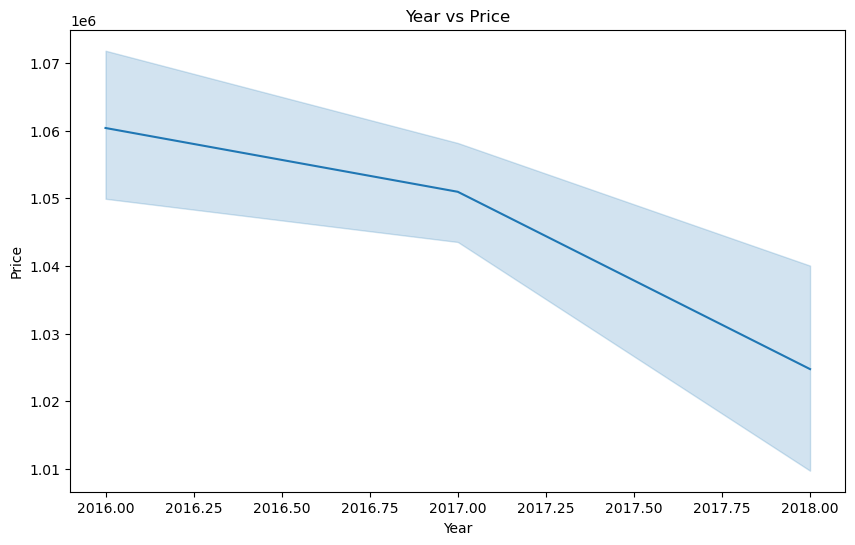

In [86]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Price', data=df, palette='Set1')
plt.title('Year vs Price')
plt.show()

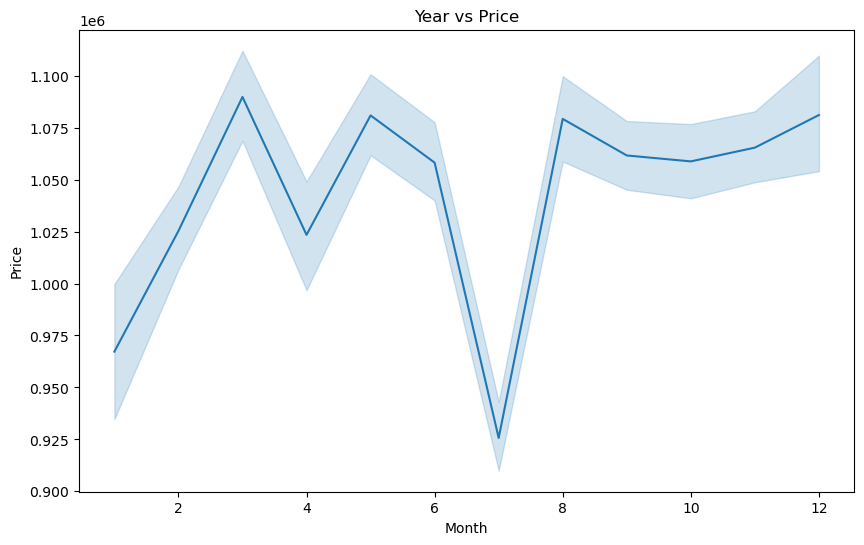

In [87]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Price', data=df, palette='Set1')
plt.title('Year vs Price')
plt.show()